In [1]:
# required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os

from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2


from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
labels_df = pd.read_csv('/content/drive/MyDrive/Grey_images/image_labels.csv')

In [4]:
labels_df.head()

,filename,label
0,1_1_1.png,1
1,1_1_2.png,1
2,1_1_3.png,1
3,1_1_4.png,1
4,1_1_5.png,1


In [5]:
labels_df.shape

(30000, 2)

In [6]:
# Step 1: Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# Step 2: Specify the path to the ZIP file
# Replace 'your-zip-file.zip' with the actual path to your ZIP file
zip_file_path = '/content/drive/MyDrive/Grey_images/word_images_zip.zip'

# Step 3: Extract the contents of the ZIP file
import zipfile
import os

# Extract all contents to a specific directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Specify the directory to extract to
    extract_dir = '/content/extracted_files'
    zip_ref.extractall(extract_dir)

# Optionally, list the extracted files to verify
extracted_files = os.listdir(extract_dir)
print("Extracted files:", extracted_files)

Extracted files: ['word_images']


In [7]:
extract_dir = '/content/extracted_files/word_images'

In [8]:
# prompt: I want to use these extracted_files which has images to build a CNN model

# Assuming your images are in '/content/extracted_files' and labels in 'labels_df'

# 1. Load Images and Labels:
images = []
labels = []
for index, row in labels_df.iterrows():
    image_path = os.path.join(extract_dir, row['filename'])
    try:
        img = load_img(image_path, color_mode='grayscale')  # Load as grayscale
        img_array = img_to_array(img)
        images.append(img_array)
        labels.append(row['label'])
    except:
        print(f"Error loading image: {image_path}")

In [9]:
# 2. Preprocess Data:
images = np.array(images)
images = images.astype('float32') / 255.0  # Normalize pixel values

In [10]:
# Assuming 'label' column in labels_df contains string labels
label_to_index = {label: i for i, label in enumerate(set(labels))}
numerical_labels = [label_to_index[label] for label in labels]
categorical_labels = to_categorical(numerical_labels)

In [11]:
X = images
y = categorical_labels

In [12]:
print(X.shape)
print(y.shape)

(30000, 40, 160, 1)
(30000, 100)


In [13]:
# Shuffle the dataset
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# 1. Define the Model
model = Sequential()

# 2. Add Convolutional and Pooling Layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:], kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())  # Added Batch Normalization

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())  # Added Batch Normalization

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())  # Added Batch Normalization

# 3. Flatten the Output
model.add(Flatten())

# 4. Add Dense Layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))  # Added Dropout for Regularization

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))  # Added Dropout for Regularization

# 5. Output Layer
model.add(Dense(100, activation='softmax'))  # Assuming 100 classes

# 6. Compile the Model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 38, 158, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 19, 79, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 19, 79, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 17, 77, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 38, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8, 38, 64)           │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 6, 36, 128)          │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 18, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 3, 18, 128)          │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6912)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,769,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          12,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,909,092 (7.28 MB)

 Trainable params: 1,908,644 (7.28 MB)

 Non-trainable params: 448 (1.75 KB)

In [17]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.0125 - loss: 4.8424 - val_accuracy: 0.0167 - val_loss: 4.5018
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0183 - loss: 4.4664 - val_accuracy: 0.0078 - val_loss: 4.6189
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.0218 - loss: 4.3571 - val_accuracy: 0.0080 - val_loss: 4.6321
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.0245 - loss: 4.2903 - val_accuracy: 0.0113 - val_loss: 5.5924
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0296 - loss: 4.1853 - val_accuracy: 0.0200 - val_loss: 4.4507
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.0334 - loss: 4.0901 - val_accuracy: 0.0115 - val_loss: 4.6284
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0389 - loss: 4.0152 - val_accuracy: 0.0073 - val_loss: 6.6127
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.0458 - loss: 3.8946 - val_

In [18]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4091 - loss: 4.5393
Test Loss: 4.3797478675842285, Test Accuracy: 0.4088333249092102


In [19]:
model.save('number_recognition_cnn.h5')

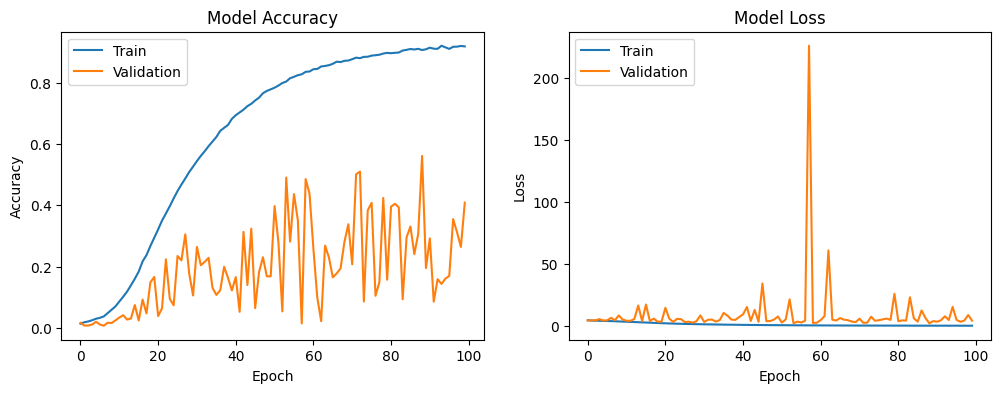

In [20]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
